In [2]:
!pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


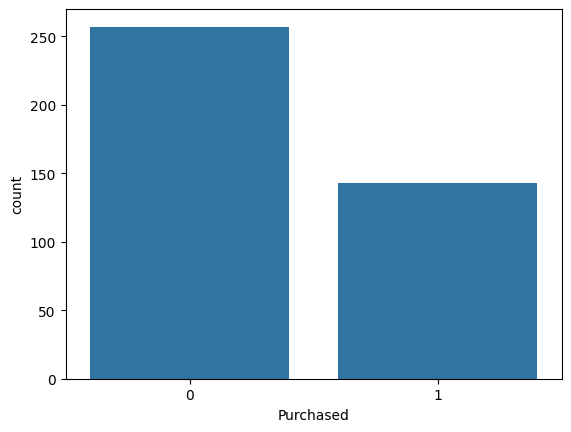

In [7]:

# Purchased 칼럼 클래스 분포 시각화
sns.countplot(x='Purchased', data=df)
plt.show()

In [8]:
# Gender 가변수 처리

df_d= pd.get_dummies(df['Gender']) # 범주형 -> 수치형(원핫인코딩) 하는 함수
df2 = pd.merge(df.drop(['Gender'], axis=1), df_d['Male'], left_index=True, right_index=True, how='inner')

df2.head()


,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [9]:
# train test split
X = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train.head()

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,True
87,15631912,28,85000,False
357,15671387,41,72000,False
355,15606472,60,34000,True
238,15617877,46,82000,False


In [10]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

print('RandomUnderSampler 적용 전 train 변수/레이블 데이터셋:', X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 train 변수/레이블 데이터셋:', X_train_under.shape, y_train_under.shape)

print('RandomUnderSampler 적용 전 레이블 값 분포: \n', pd.Series(y_train['Purchased']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n', pd.Series(y_train_under['Purchased']).value_counts())


RandomUnderSampler 적용 전 train 변수/레이블 데이터셋: (300, 4) (300, 1)
RandomUnderSampler 적용 후 train 변수/레이블 데이터셋: (224, 4) (224, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 Purchased
0    112
1    112
Name: count, dtype: int64


<Axes: xlabel='Purchased', ylabel='count'>

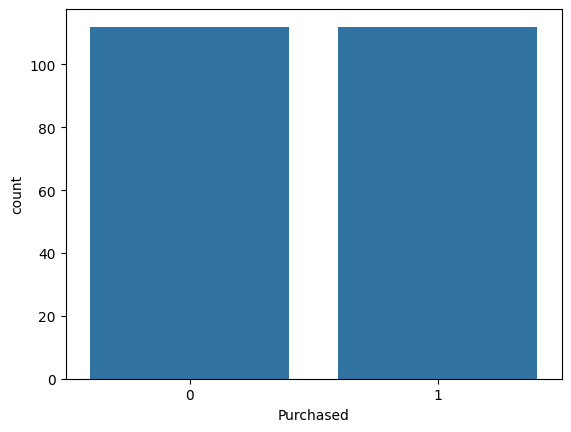

In [11]:
# 언더샘플링 적용 후 Purchased 칼럼 클래스 분포 시각화
sns.countplot(x='Purchased', data=y_train_under)

In [14]:
# 오버샘플링 적용(SMOTE)

smote = SMOTE(k_neighbors=2, random_state=0)
oversample = SMOTE()

X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트: '
      , X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['Purchased']).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_over['Purchased']).value_counts())

SMOTE 적용 전 학습용 변수/레이블 데이터 세트:  (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트:  (376, 4) (376, 1)
SMOTE 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 Purchased
0    188
1    188
Name: count, dtype: int64


<Axes: xlabel='Purchased', ylabel='count'>

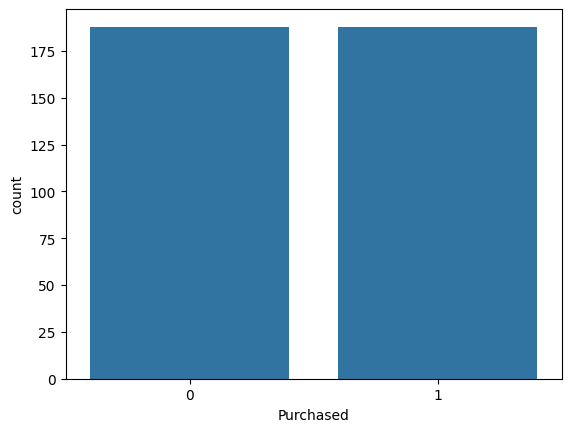

In [15]:

# 오버샘플링 적용 후 Purchased 칼럼 클래스 분포 시각화
sns.countplot(x='Purchased', data=y_train_over)